29
Dimenzije trening podataka:
X shape: (15219, 224, 224, 3)
Y shape: (15219,)

Dimenzije validacijskih podataka:
X_valid shape: (3922, 224, 224, 3)
Y_valid shape: (3922,)
Broj slika: 19141


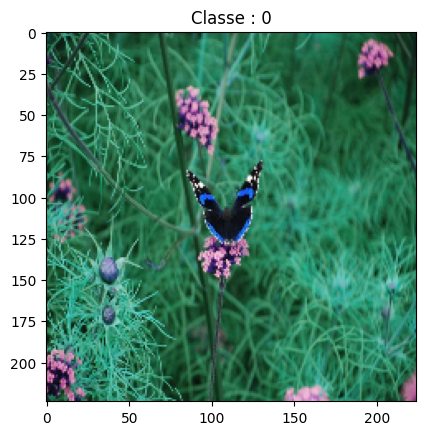

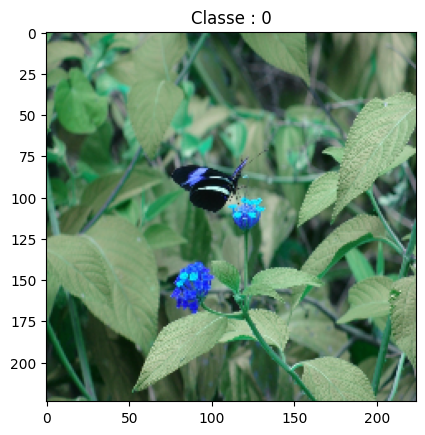

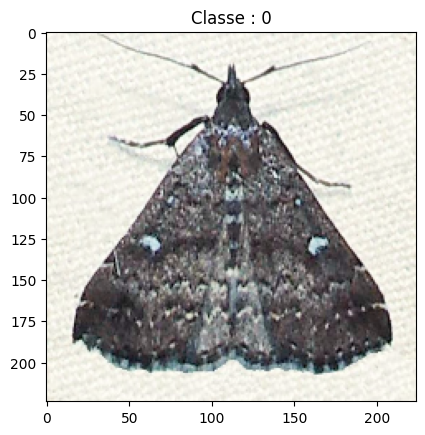

Epoch 1/10
476/476 ━━━━━━━━━━━━━━━━━━━━ 1825s 4s/step - accuracy: 0.6899 - loss: 1.1030 - val_accuracy: 0.8684 - val_loss: 0.5122
Epoch 2/10
476/476 ━━━━━━━━━━━━━━━━━━━━ 1819s 4s/step - accuracy: 0.8637 - loss: 0.4111 - val_accuracy: 0.8794 - val_loss: 0.4337
Epoch 3/10
476/476 ━━━━━━━━━━━━━━━━━━━━ 1803s 4s/step - accuracy: 0.9046 - loss: 0.2807 - val_accuracy: 0.8858 - val_loss: 0.4269
Epoch 4/10
476/476 ━━━━━━━━━━━━━━━━━━━━ 1795s 4s/step - accuracy: 0.9213 - loss: 0.2201 - val_accuracy: 0.8623 - val_loss: 0.5767
Epoch 5/10
476/476 ━━━━━━━━━━━━━━━━━━━━ 1791s 4s/step - accuracy: 0.9366 - loss: 0.1695 - val_accuracy: 0.8774 - val_loss: 0.5809
Epoch 6/10
476/476 ━━━━━━━━━━━━━━━━━━━━ 1807s 4s/step - accuracy: 0.9502 - loss: 0.1291 - val_accuracy: 0.8837 - val_loss: 0.6003
Epoch 7/10
476/476 ━━━━━━━━━━━━━━━━━━━━ 1871s 4s/step - accuracy: 0.9565 - loss: 0.1151 - val_accuracy: 0.8830 - val_loss: 0.6825
Epoch 8/10
476/476 ━━━━━━━━━━━━━━━━━━━━ 1825s 4s/step - accuracy: 0.9520 - loss: 0.1234 - 

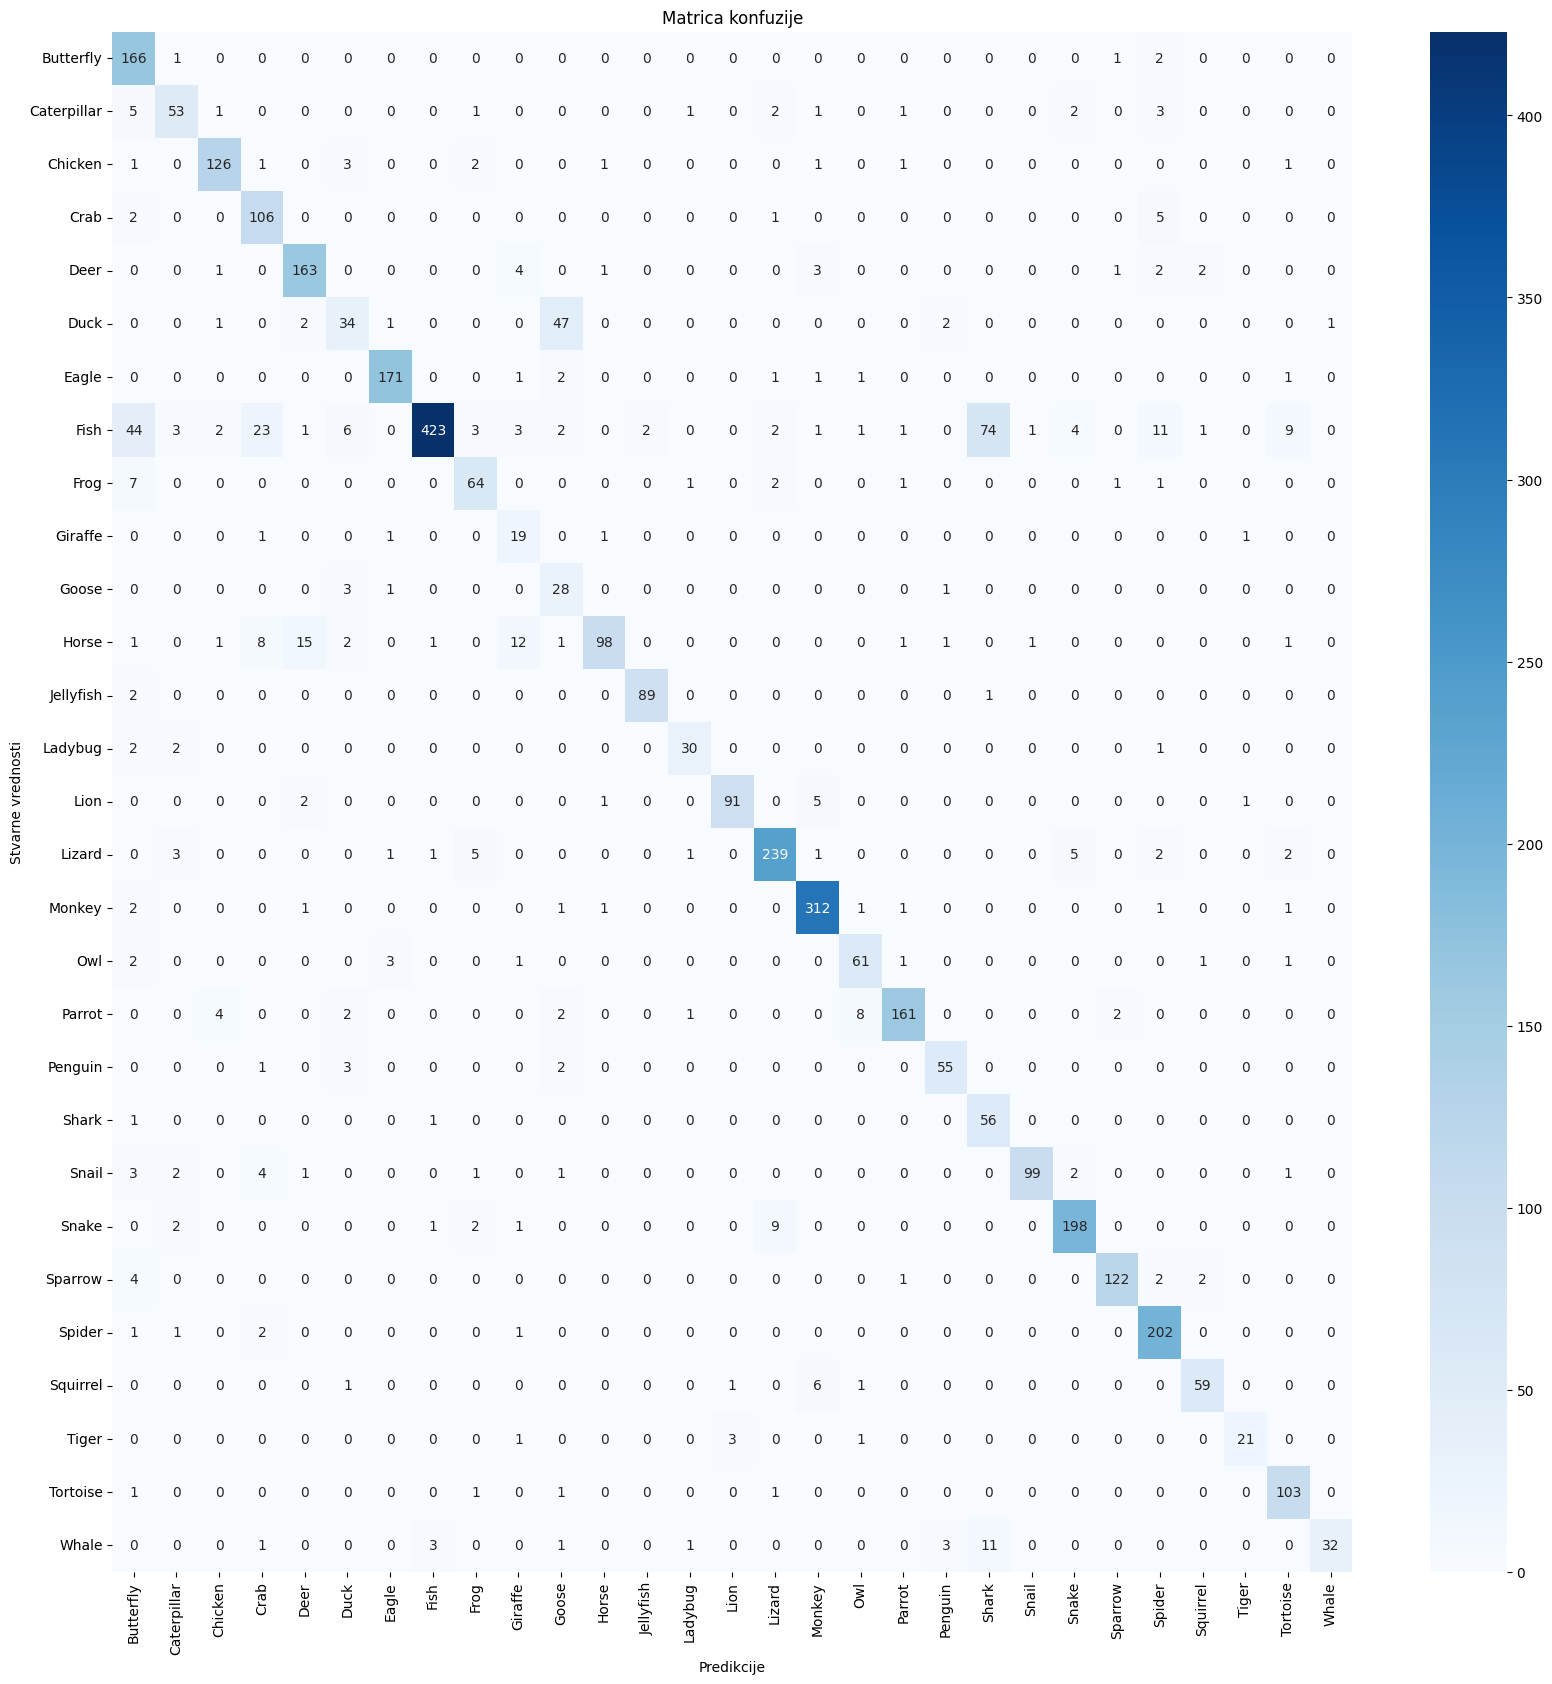

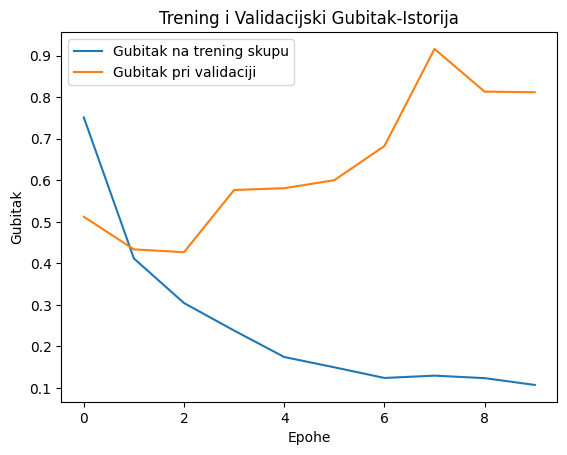

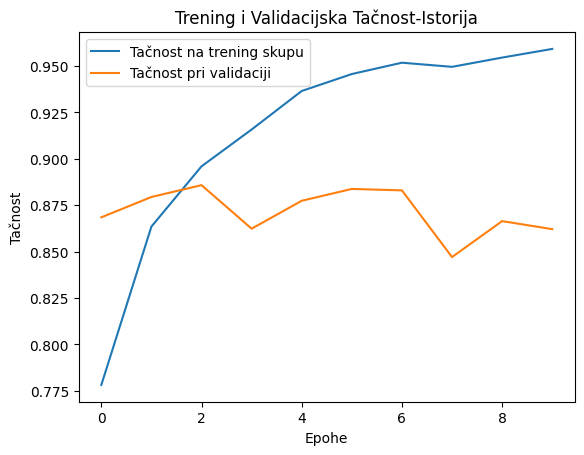

              precision    recall  f1-score   support

   Butterfly       0.68      0.98      0.80       170
 Caterpillar       0.79      0.76      0.77        70
     Chicken       0.93      0.92      0.92       137
        Crab       0.72      0.93      0.81       114
        Deer       0.88      0.92      0.90       177
        Duck       0.63      0.39      0.48        88
       Eagle       0.96      0.96      0.96       178
        Fish       0.98      0.69      0.81       617
        Frog       0.81      0.83      0.82        77
     Giraffe       0.44      0.83      0.58        23
       Goose       0.32      0.85      0.46        33
       Horse       0.95      0.69      0.80       143
   Jellyfish       0.98      0.97      0.97        92
     Ladybug       0.86      0.86      0.86        35
        Lion       0.96      0.91      0.93       100
      Lizard       0.93      0.92      0.92       260
      Monkey       0.94      0.97      0.96       321
         Owl       0.82    

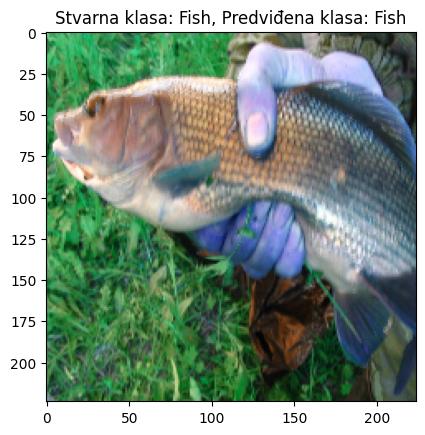

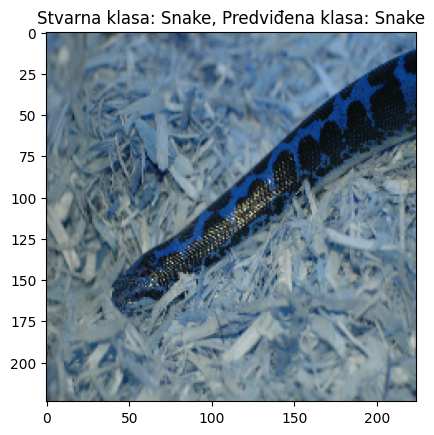

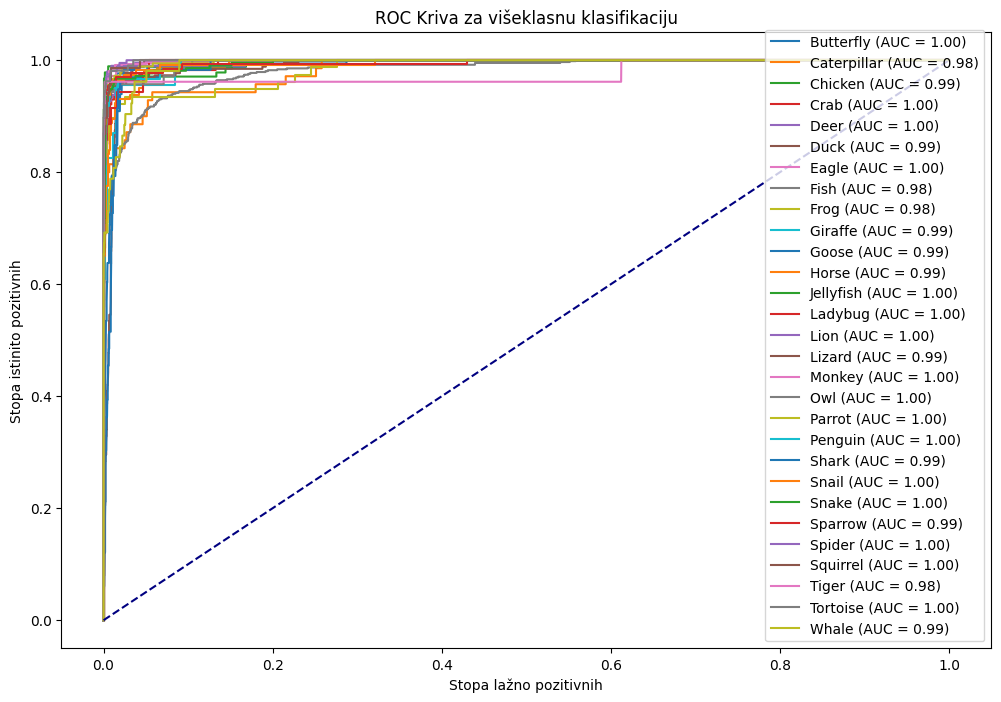

Mikro preciznost: 0.8620601733809281
Mikro odziv: 0.8620601733809281
Mikro F1-score: 0.8620601733809281

Makro preciznost: 0.835117373113828
Makro odziv: 0.8601709676540247
Makro F1-score: 0.8313647569681507


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import cv2 as cv
import os
from tensorflow import keras
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from keras.models import Sequential
from sklearn.metrics import precision_score, recall_score, f1_score
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical

train_dir = r'/kaggle/input/animals-detection-images-dataset/train/'
test_dir = r'/kaggle/input/animals-detection-images-dataset/test/'

labels = ['Butterfly',
       'Caterpillar','Chicken', 'Crab',
       'Deer', 'Duck', 'Eagle','Fish',
       'Frog', 'Giraffe','Goose', 'Horse',
       'Jellyfish', 'Ladybug', 'Lion',
       'Lizard','Monkey','Owl', 'Parrot',
       'Penguin',
       'Shark','Snail', 'Snake',
       'Sparrow', 'Spider','Squirrel',
       'Tiger', 'Tortoise','Whale']

label_len = len(labels)
print(label_len)

# Varijable za trening podatke
X = []
Y = []

# Učitavanje podataka
for label in labels:
    folderpath = os.path.join(train_dir, label)
    
    for file in os.listdir(folderpath):
        img_path = os.path.join(folderpath, file)
        img = cv.imread(img_path)
        
        if img is not None:
            img = cv.resize(img, (224, 224))
            X.append(np.array(img))
            Y.append(labels.index(label))

# Konverzija listi u NumPy matrice
X = np.array(X)
Y = np.array(Y)

print("Dimenzije trening podataka:")
print("X shape:", X.shape)
print("Y shape:", Y.shape)

# Varijable za validacijske podatke
X_valid = []
Y_valid = []
X_valid_path = []

for label in labels:
    folderpath = os.path.join(test_dir, label)
    
    for file in os.listdir(folderpath):
        img_path = os.path.join(folderpath, file)
        img = cv.imread(img_path)
        
        if img is not None:
            img = cv.resize(img, (224, 224))
            X_valid.append(np.array(img))
            X_valid_path.append(img_path)
            Y_valid.append(labels.index(label))
            
X_valid = np.array(X_valid)
Y_valid = np.array(Y_valid)

print("\nDimenzije validacijskih podataka:")
print("X_valid shape:", X_valid.shape)
print("Y_valid shape:", Y_valid.shape)

total_images = X.shape[0] + X_valid.shape[0]
print("Broj slika:", total_images)

for i in range(3):
    plt.imshow(X[i])
    plt.title(f"Classe : {Y[i]}")
    plt.show()
    
base_model = ResNet50(weights=None, include_top=False, input_shape=(224, 224, 3))
weights_path = '/kaggle/input/tezine/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'
base_model.load_weights(weights_path)

base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(len(labels), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Konverzija oznaka u kategorije one-hot
Y_one_hot = to_categorical(Y)
Y_valid_one_hot = to_categorical(Y_valid)

history = model.fit(X, Y_one_hot, epochs=10, validation_data=(X_valid, Y_valid_one_hot))

Y_pred = model.predict(X_valid)
Y_pred_classes = np.argmax(Y_pred, axis=1) 

conf_matrix = confusion_matrix(Y_valid, Y_pred_classes)
acc_score = accuracy_score(Y_valid, Y_pred_classes)
print("Tačnost rezultata:", acc_score)

plt.figure(figsize=(20,20))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title('Matrica konfuzije')
plt.xlabel('Predikcije')
plt.ylabel('Stvarne vrednosti')
plt.show()

# Provera gubitaka
plt.plot(history.history['loss'], label='Gubitak na trening skupu')
plt.plot(history.history['val_loss'], label='Gubitak pri validaciji')
plt.title('Trening i Validacijski Gubitak-Istorija')
plt.ylabel('Gubitak')
plt.xlabel('Epohe')
plt.legend()
plt.show()

# Tačnost
plt.plot(history.history['accuracy'], label='Tačnost na trening skupu')
plt.plot(history.history['val_accuracy'], label='Tačnost pri validaciji')
plt.title('Trening i Validacijska Tačnost-Istorija')
plt.ylabel('Tačnost')
plt.xlabel('Epohe')
plt.legend()
plt.show()

report = classification_report(Y_valid, Y_pred_classes, target_names=labels)
print(report)

model.save('ResNet50_DEL.h5')

# Prikazivanje predikcija za nekoliko slika
num_images_to_display = 2

# Dobivanje predikcija za testni skup
Y_pred = model.predict(X_valid)
Y_pred_classes = np.argmax(Y_pred, axis=1)

# Prikazivanje slika s pripadajućim stvarnim i predviđenim klasama
for i in range(num_images_to_display):
    # Indeks slike koju ćemo prikazati
    idx = np.random.randint(0, len(X_valid))
    
    # Prikazivanje slike
    plt.imshow(X_valid[idx])
    plt.title(f"Stvarna klasa: {labels[Y_valid[idx]]}, Predviđena klasa: {labels[Y_pred_classes[idx]]}")
    plt.show()

from sklearn.metrics import roc_curve, auc

# Izračunavanje ROC krive i AUC za svaku klasu
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(labels)):
    fpr[i], tpr[i], _ = roc_curve(Y_valid_one_hot[:, i], Y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Prikazivanje ROC krive za svaku klasu
plt.figure(figsize=(12, 8))
for i in range(len(labels)):
    plt.plot(fpr[i], tpr[i], label=f'{labels[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('Stopa lažno pozitivnih')
plt.ylabel('Stopa istinito pozitivnih')
plt.title('ROC Kriva za višeklasnu klasifikaciju')
plt.legend(loc="lower right")
plt.show()


# Mikro prosečne metrike
micro_precision = precision_score(Y_valid, Y_pred_classes, average='micro')
micro_recall = recall_score(Y_valid, Y_pred_classes, average='micro')
micro_f1 = f1_score(Y_valid, Y_pred_classes, average='micro')

print("Mikro preciznost:", micro_precision)
print("Mikro odziv:", micro_recall)
print("Mikro F1-score:", micro_f1)

# Makro prosečne metrike
macro_precision = precision_score(Y_valid, Y_pred_classes, average='macro')
macro_recall = recall_score(Y_valid, Y_pred_classes, average='macro')
macro_f1 = f1_score(Y_valid, Y_pred_classes, average='macro')

print("\nMakro preciznost:", macro_precision)
print("Makro odziv:", macro_recall)
print("Makro F1-score:", macro_f1)


